In [1]:
import pandas as pd
import os
import time
from datetime import datetime

In [2]:
path = "/Users/henry/Documents/github/ml_with_scikit_learn_n_python/intraQuarter"

In [3]:
def Key_Stats(gather="Total Debt/Equity (mrq)"):
    statspath = path+'/_KeyStats'
    stock_list = [x[0] for x in os.walk(statspath)]
    #print(stock_list)

    df = pd.DataFrame(columns = ['Date',
                                 'Unix',
                                 'Ticker',
                                 'DE Ratio',
                                 'Price',
                                 'stock_p_change',
                                 'SP500',
                                 'sp500_p_change'])
    sp500_df = pd.DataFrame.from_csv("/Users/henry/Documents/github/ml_with_scikit_learn_n_python/YAHOO-INDEX_GSPC.csv")

    ticker_list = []

    for each_dir in stock_list[1:25]:
        each_file = os.listdir(each_dir)
        ticker = each_dir.split("/")[-1]
        ticker_list.append(ticker)

        starting_stock_value = False
        starting_sp500_value = False
        if len(each_file) > 0:
            for file in each_file:
                date_stamp = datetime.strptime(file, '%Y%m%d%H%M%S.html')
                unix_time = time.mktime(date_stamp.timetuple())
                full_file_path = each_dir+'/'+file
                source = open(full_file_path,'r').read()
                try:
                    value = float(source.split(gather+':</td><td class="yfnc_tabledata1">')[1].split('</td>')[0])

                    try:
                        sp500_date = datetime.fromtimestamp(unix_time).strftime('%Y-%m-%d')
                        row = sp500_df[(sp500_df.index == sp500_date)]
                        sp500_value = float(row["Adj Close"])
                    except:
                        sp500_date = datetime.fromtimestamp(unix_time-259200).strftime('%Y-%m-%d')
                        row = sp500_df[(sp500_df.index == sp500_date)]
                        sp500_value = float(row["Adj Close"])
                        
                    stock_price = float(source.split('</small><big><b>')[1].split('</b></big>')[0])
                    #print("stock_price:",stock_price,"ticker:", ticker)

                    if not starting_stock_value:
                        starting_stock_value = stock_price
                    if not starting_sp500_value:
                        starting_sp500_value = sp500_value
                    stock_p_change = ((stock_price - starting_stock_value) / starting_stock_value) * 100
                    sp500_p_change = ((sp500_value - starting_sp500_value) / starting_sp500_value) * 100

                    df = df.append({'Date':date_stamp,
                                    'Unix':unix_time,
                                    'Ticker':ticker,
                                    'DE Ratio':value,
                                    'Price':stock_price,
                                    'stock_p_change':stock_p_change,
                                    'SP500':sp500_value,
                                    'sp500_p_change':sp500_p_change}, ignore_index = True)
                except Exception as e:
                    pass
                    #print(str(e))

    save = gather.replace(' ','').replace(')','').replace('(','').replace('/','')+('.csv')
    print(save)
    df.to_csv(save)                        

In [4]:
Key_Stats()

TotalDebtEquitymrq.csv


In [5]:
import pandas as pd
import os
import time
from datetime import datetime
from time import mktime

import matplotlib
import matplotlib.pyplot as plt

from matplotlib import style
#style.use('dark_background')
style.use('ggplot')

import re
import urllib

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [8]:
def Key_Stats_Label(gather="Total Debt/Equity (mrq)"):

    statspath = path+'/_KeyStats'
    stock_list = [x[0] for x in os.walk(statspath)]
    df = pd.DataFrame(columns = ['Date','Unix','Ticker','DE Ratio','Price','stock_p_change','SP500','sp500_p_change','Difference','Status'])
    ticker_list = []

    sp500_df = pd.DataFrame.from_csv("/Users/henry/Documents/Skill/python/YAHOO-INDEX_GSPC.csv")

    for each_dir in stock_list[1:5]:
        ticker = each_dir.split("/")[-1]
        each_file = os.listdir(each_dir)
        ticker_list.append(ticker)

        starting_stock_value = False
        starting_sp500_value = False

        if len(each_file) > 0:

            for file in each_file:
                #print(file)

                date_stamp = datetime.strptime(file, '%Y%m%d%H%M%S.html')
                unix_time = mktime(date_stamp.timetuple())
                full_file_path = each_dir+'/'+file
                source = open(full_file_path,'r').read()

                try:

                    try:
                        value = float(source.split(gather+':</td><td class="yfnc_tabledata1">')[1].split('</td>')[0])
                    except:
                        value = float(source.split(gather+':</td>\n<td class="yfnc_tabledata1">')[1].split('</td>')[0])

                    try:
                        sp500_date = datetime.fromtimestamp(unix_time).strftime('%Y-%m-%d')
                        row = sp500_df[(sp500_df.index == sp500_date)]
                        sp500_value = float(row['Adjusted Close'])
                    except:
                        sp500_date = datetime.fromtimestamp(unix_time-259200).strftime('%Y-%m-%d')
                        row = sp500_df[(sp500_df.index == sp500_date)]
                        sp500_value = float(row['Adjusted Close'])

                    try:
                        stock_price = float(source.split('</small><big><b>')[1].split('</b></big>')[0])
                    except:

                        try:
                            stock_price = (source.split('</small><big><b>')[1].split('</b></big>')[0])
                            #print(stock_price)

                            stock_price = re.search(r'(\d{1,8}\.\d{1,8})', stock_price)

                            stock_price = float(stock_price.group(1))
                            #print(stock_price)

                        except:

                            try:
                                stock_price = (source.split('<span class="time_rtq_ticker">')[1].split('</span>')[0])
                                #print(stock_price)

                                stock_price = re.search(r'(\d{1,8}\.\d{1,8})', stock_price)

                                stock_price = float(stock_price.group(1))
                                #print(stock_price)

                            except:

                                print('wtf stock price lol',ticker,file, value)
                                time.sleep(5)

                    if not starting_stock_value:
                        starting_stock_value = stock_price

                    if not starting_sp500_value:
                        starting_sp500_value = sp500_value


                    stock_p_change = ((stock_price - starting_stock_value) / starting_stock_value) * 100
                    sp500_p_change = ((sp500_value - starting_sp500_value) / starting_sp500_value) * 100
                    
                    location = len(df['Date'])
                    difference = stock_p_change-sp500_p_change
                    if difference > 0:
                        status = "outperform"
                    else:
                        status = "underperform"
                    df = df.append({'Date':date_stamp,
                                    'Unix':unix_time,
                                    'Ticker':ticker,
                                    'DE Ratio':value,
                                    'Price':stock_price,
                                    'stock_p_change':stock_p_change,
                                    'SP500':sp500_value,
                                    'sp500_p_change':sp500_p_change,
                                    ############################
                                    'Difference':difference,
                                    'Status':status},
                                   ignore_index=True)


                except Exception as e:
                    pass
                    #print(ticker,e,file, value)

    #print(ticker_list)
    #print(df)
    
    for each_ticker in ticker_list:
        try:
            plot_df = df[(df['Ticker'] == each_ticker)]
            plot_df = plot_df.set_index(['Date'])

            if plot_df['Status'][-1] == 'underperform':
                color = 'r'
            else:
                color = 'g'

            plot_df['Difference'].plot(label=each_ticker, color=color)
            plt.legend()
        except Exception as e:
            print(str(e))

    plt.show()

    save = gather.replace(' ','').replace(')','').replace('(','').replace('/','')+str('.csv')
    print(save)
    df.to_csv(save)

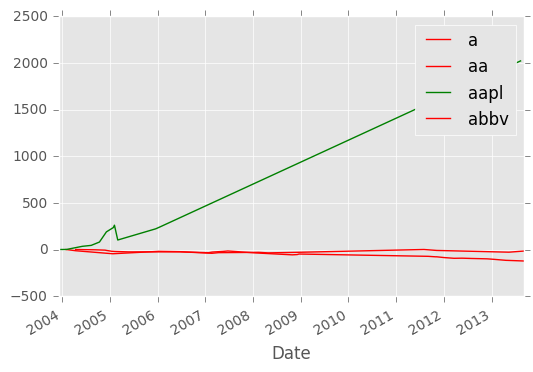

TotalDebtEquitymrq.csv


In [9]:
Key_Stats_Label()